## Optimization with a mix of continuous and discrete variables

In [14]:
%pylab inline
import GPyOpt
from numpy.random import seed
seed(1234)
        
# --- Fucntion to optimize
func  = GPyOpt.objective_examples.experiments2d.sixhumpcamel() 
#func  = GPyOpt.objective_examples.experiments1d.forrester() 

# --- Space design
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
                                    {'name': 'var_2', 'type': 'discrete', 'domain': (-1.5,0,1,1.2,1.3)}])

# --- Objective
objective = GPyOpt.core.task.SingleObjective(func.f, space)

# --- CHOOSE the model type
model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.MixedAcqOptimizer(space,1000, search=True)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, space, optimizer=aquisition_optimizer)

# --- CHOOSE the intial design
initial_design = GPyOpt.util.stats.initial_design('random', space, 10)

# BO object
bo = GPyOpt.core.BO(model, space, objective, acquisition, initial_design)

print '-----'
print '----- Running demo. It may take a few seconds.'
print '-----'

# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 

Populating the interactive namespace from numpy and matplotlib
-----
----- Running demo. It may take a few seconds.
-----
Optimization restart 1/5, f = 5.72543024611
Optimization restart 2/5, f = 5.72543024046
Optimization restart 3/5, f = 5.72543024072
Optimization restart 4/5, f = 5.72775110773
Optimization restart 5/5, f = 5.72543024061
Optimization restart 1/5, f = 7.21676271341
Optimization restart 2/5, f = 7.2167627184
Optimization restart 3/5, f = 7.21676271247
Optimization restart 4/5, f = 7.21676271247
Optimization restart 5/5, f = 7.21676271247
Optimization restart 1/5, f = 8.52086393643
Optimization restart 2/5, f = 8.5208639364
Optimization restart 3/5, f = 8.52086393644
Optimization restart 4/5, f = 8.5208639364
Optimization restart 5/5, f = 8.52086393772
Optimization restart 1/5, f = 8.23608678054
Optimization restart 2/5, f = 8.23608677826
Optimization restart 3/5, f = 8.2360867782
Optimization restart 4/5, f = 8.2360867782
Optimization restart 5/5, f = 8.23608677825
Opt

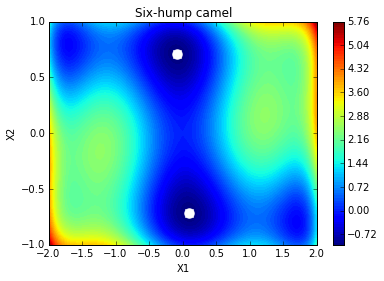

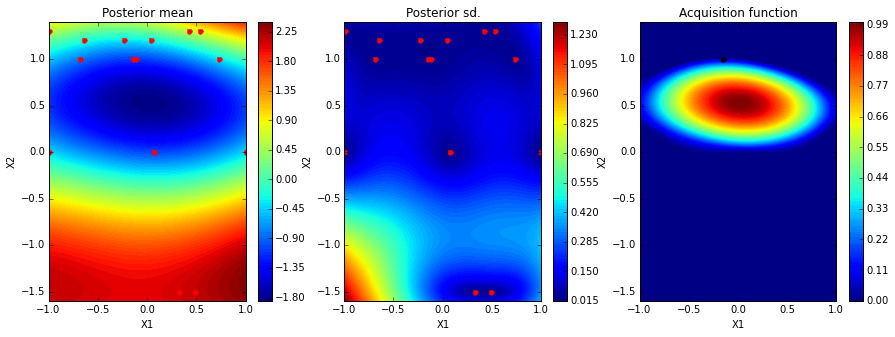

In [15]:
func.plot()
bo.plot_acquisition()


In [11]:
bo.model.model.optimize_restarts(3,messages=0)

Optimization restart 1/3, f = 1.42576669402
Optimization restart 2/3, f = 1.42576693432
Optimization restart 3/3, f = 1.42576669059


In [14]:
bo.acquisition_func.acquisition_function_withGradients(initial_design[0,:])[1,[1]]

TypeError: tuple indices must be integers, not tuple

In [ ]:
def initial_design(design,bounds,data_init):
	"""
	:param design: the choice of designs
	:param bounds: the boundary of initial points
	:param data_init: the number of initial points
	"""
	if design == 'random':
		X_design = samples_multidimensional_uniform(bounds, data_init)
	elif design == 'latin':
		try:
			from pyDOE import lhs
			import numpy as np
			# Genretate point in unit hypercube
			X_design_aux = lhs(len(bounds),data_init, criterion='center')
			# Normalize to the give box constrains
			lB = np.asarray(bounds)[:,0].reshape(1,len(bounds))
			uB = np.asarray(bounds)[:,1].reshape(1,len(bounds))
			diff = uB-lB
			I = np.ones((X_design_aux.shape[0],1))
			X_design = np.dot(I,lB) + X_design_aux*np.dot(I,diff)
		except:
			print("Cannot find pyDOE library, please install it to use a Latin hypercube to initialize the model.")
	return X_design